In [51]:
import spacy
import re
import emoji


nlp = spacy.load("en")

In [108]:
import pandas as pd
pd.set_option('max_colwidth', 80)

from re import sub, split
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE, MDS
import seaborn as sns

def plot_embedding(V, y):
    """ Visualizes a vocabulary embedding via TSNE """
    V = TruncatedSVD(50).fit_transform(V)
    d = TSNE(metric='cosine').fit_transform(V)
    d = pd.DataFrame(d).assign(label = y.reset_index(drop=True))
    return sns.scatterplot(x = 0, y = 1, hue = 'label', data = d), d


def clean_twitter(s):
    """ Cleans Twitter specific issues
    
    Should probably clean out mentions, URLs, and RT's.
    """

    # TODO: Use regular expressions to remove unwanted
    # text and clean up our tweets to be more usable!
    
    s = sub("@"," ",s) # @
    s = sub("RT","",s) # Retweets
    s = sub("&amp;", "and",s) # & 
    s = sub(r"http\S+", "", s) # Hyperlinks
    s = sub("\n","",s) # line break
    s = sub("%", " percent", s) #percentages
    s = ' '.join(s.split()) # Extra Whitespace
    s = emoji.demojize(s) # Convergt Emoji to text
    
    
    
    # BONUS: Try using the library "spacy" to 
    # do further processing, such as lemmatizing
    # or replacing Named Entities with constants (i.e. "[NAMED]")
    # or adding the part of speech or dependency code to the word 
    
    
    return s

def clean_twitter_bonus(s):
    """ Cleans Twitter specific issues
    
    Should probably clean out mentions, URLs, and RT's.
    """

    # TODO: Use regular expressions to remove unwanted
    # text and clean up our tweets to be more usable!
    
    s = clean_twitter(s)


    # Lemmatize, remove stop words and remove punctuation
    doc = nlp(s)
    s = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]

    # Join back to string
    s = ' '.join([w for w in s])
    
    return s


In [109]:
X = pd.read_csv('data/tweets.csv').tweet
y = pd.read_csv('data/tweets.csv').label

In [110]:
X.map(clean_twitter)

0       LilMissRightie: Here's CNN on Sharia law. You can be stoned or have your han...
1       NetworksManager: LOOK obama Clinton cronies ILLEGALLY arm and train muslims ...
2       GrrrGraphics: #ThrowbackThursday #BenGarrison #cartoon from 2013 #Obama gets...
3               PeterTownsend7: Say 'Islam is peace', or else! #trump #maga #isis #tcot
4       ToddDracula: realDonaldTrump All aboard the Trump Train! #ChooChoo :locomotive:
5       JudicialWatch: FLASHBACK &gt;&gt; Judicial Watch Releases Huma Abedin Deposi...
6       LouDobbs: Following FBI presser, realDonaldTrump says “the system is rigged!...
7                         Ricky_Vaughn99: Trump: "We're Running Against a Rigged Press"
8       mitchellvii: Literally 98 percent of Hillary supporters I see online are ast...
9                                   ClarkW2016: ConstantinCI CathyTo47590555 Islam. ...
10      MightyBusterBro: .PSYCHO - MOTHERHillary at her most EVIL.#MAGA #BasketOfDep...
11      ThomasPKennedy3: The unt

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

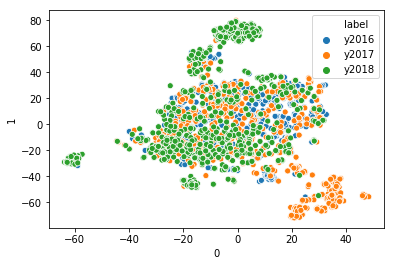

In [112]:
# Let's visualize our data by using nothing but the Sklearn default
# cleaning and tokenizing

vectorizer = CountVectorizer()
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

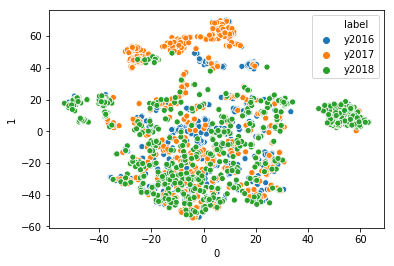

In [113]:
# Now let's see what our cleaning has done
vectorizer = CountVectorizer(preprocessor = clean_twitter)
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)

In [114]:
# Now try with TF-IDF vectorizer, and add implicit stopwords!
# Can you get things to separate in the space in a better way? 

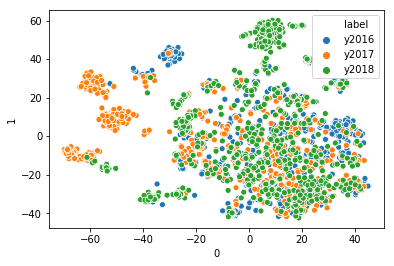

In [115]:
vectorizer = TfidfVectorizer(preprocessor = clean_twitter)
V = vectorizer.fit_transform(X)
ax, d = plot_embedding(V, y)